In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd 
import numpy as np 

In [6]:
path="../kaggle/input/churn-prediction-for-credit-card-customer/"
data=pd.read_csv(path+'Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../kaggle/input/churn-prediction-for-credit-card-customer/Churn.csv'

In [8]:
data=pd.read_csv('/kaggle/input/churn-prediction-for-credit-card-customer/Churn.csv')

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
data.duplicated().sum()

0

In [12]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [16]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [19]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [20]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
train_x_scal=scal.fit_transform(train_x)
test_x_scal=scal.fit_transform(test_x)

In [21]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2024-03-15 05:07:24.800689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 05:07:24.800853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 05:07:24.925325: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [25]:
data.shape

(10000, 11)

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
#log loss 
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [36]:
hist=model.fit(train_x_scal,train_y,epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3952
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3904
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3873
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3990
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3894
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3919
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3891
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3908
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3833
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3827
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3730
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3807
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3776
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3707
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

In [37]:
hist.history

{'loss': [0.39534318447113037,
  0.39383700489997864,
  0.39235803484916687,
  0.3909660279750824,
  0.3896197974681854,
  0.3884642720222473,
  0.38732853531837463,
  0.3861426115036011,
  0.3850852847099304,
  0.38407665491104126,
  0.3831133246421814,
  0.3822057545185089,
  0.381314218044281,
  0.3804871439933777,
  0.3796790838241577,
  0.37891215085983276,
  0.3781847059726715,
  0.3774300813674927,
  0.3768129348754883,
  0.3761744797229767]}

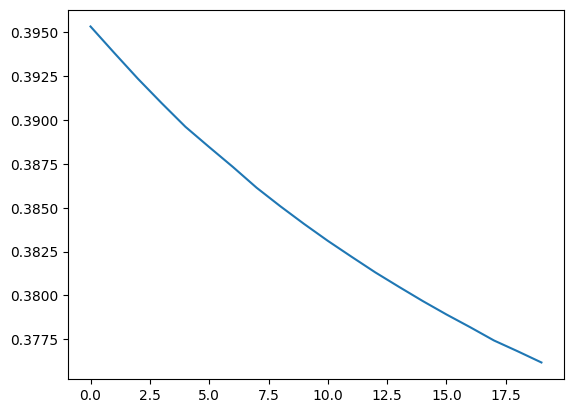

In [38]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'])
plt.show()

In [39]:
model.layers[0].get_weights()

[array([[ 0.08037848,  0.1196643 ,  0.1474244 ],
        [ 0.3610362 ,  0.06022859, -3.3913538 ],
        [-0.00451929,  0.10292985,  0.19368742],
        [ 0.47999084,  1.0726767 , -0.3584138 ],
        [ 0.84498835,  3.342487  , -0.62644297],
        [-0.06709932,  0.02615667, -0.0795166 ],
        [-1.3375719 ,  0.45299092, -0.40757462],
        [ 0.2439445 , -0.08793483,  0.19706981],
        [ 0.65561974, -0.79213333,  0.1281579 ],
        [ 0.19220358,  0.106847  ,  0.02409652],
        [-0.53015506,  0.06445522,  0.08987627]], dtype=float32),
 array([-0.8874871,  1.6748854,  0.4633176], dtype=float32)]

In [40]:
model.layers[1].get_weights()

[array([[ 2.1971219],
        [-2.0037231],
        [-2.175913 ]], dtype=float32),
 array([0.01524802], dtype=float32)]

In [41]:
model.predict(test_x_scal)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.2561349 ],
       [0.07769155],
       [0.11754397],
       ...,
       [0.06506271],
       [0.28754503],
       [0.06076618]], dtype=float32)

In [42]:
y_pred=np.where(model.predict(test_x_scal)>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

0.835

In [45]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist_=model.fit(train_x_scal,train_y,epochs=40,validation_split=0.2)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4955 - loss: 0.7309 - val_accuracy: 0.7919 - val_loss: 0.5095
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4858 - val_accuracy: 0.8056 - val_loss: 0.4550
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4422 - val_accuracy: 0.8206 - val_loss: 0.4316
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8213 - loss: 0.4159 - val_accuracy: 0.8181 - val_loss: 0.4182
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8256 - loss: 0.4098 - val_accuracy: 0.8219 - val_loss: 0.4036
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8310 - loss: 0.3918 - val_accuracy: 0.8344 - val_loss: 0.3893
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.3779 - val_accuracy: 0.8431 - val_loss: 0.3768
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3680 - val_accuracy: 0.

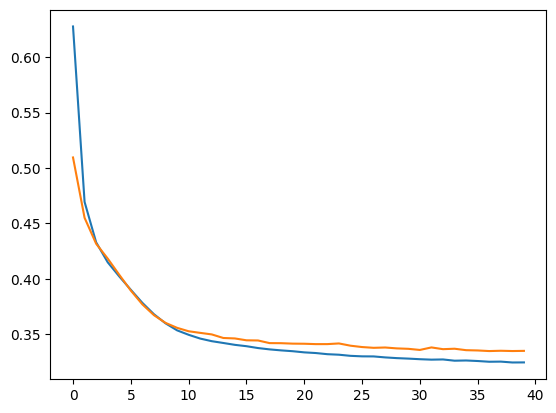

In [48]:
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])
plt.show()

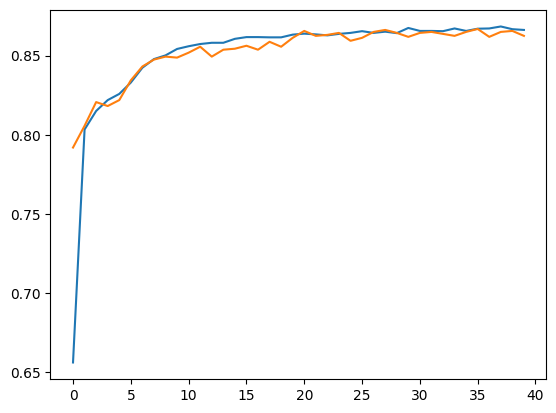

In [49]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['val_accuracy'])
plt.show()

In [50]:
y_pred=np.where(model.predict(test_x_scal)>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [51]:
accuracy_score(test_y,y_pred)

0.855